In [1]:
import numpy as np
import matplotlib.pyplot as plt
from imageio import imread

%matplotlib inline 

# Part a)

In [2]:
def low_rank_approximation(X, rank):
    # YOUR CODE GOES HERE
    #step 1: 
    #compute the SVD of the image data matrix
    #step 2: take the first rank singular values 
    #step 3: generate a diagonal matrix of singular values, and then matrix multiply
    #to generate the approximation
    #step 4: generate and show the new image. 
    u, s, vh = np.linalg.svd(X, full_matrices = False)
    s[rank:] = 0
    s = np.diag(s)
    return u @ s @ vh

In [3]:
face = imread("./data/face.jpg")

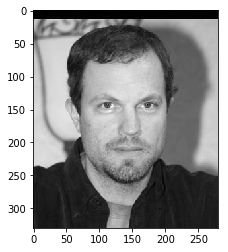

In [4]:
plt.imshow(face, cmap = 'gray')

In [5]:
rank5face = low_rank_approximation(face, 5)

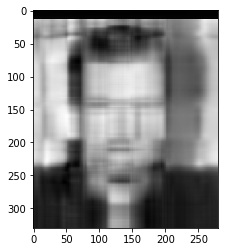

In [6]:
plt.imshow(rank5face, cmap = 'gray')

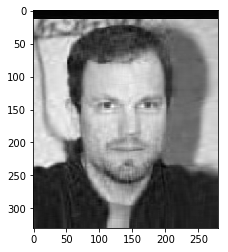

In [7]:
rank20face = low_rank_approximation(face, 20)
plt.imshow(rank20face, cmap = 'gray')

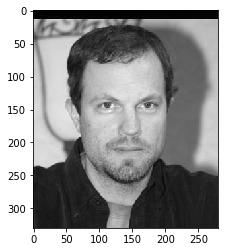

In [8]:
rank100face = low_rank_approximation(face, 100)
plt.imshow(rank100face, cmap = 'gray')

# Part b)

In [9]:
sky = imread("./data/sky.jpg")

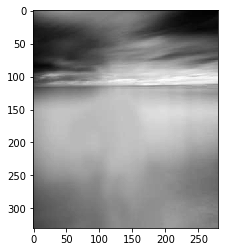

In [11]:
plt.imshow(sky, cmap = 'gray')

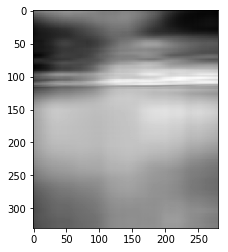

In [12]:
rank5sky = low_rank_approximation(sky, 5)
plt.imshow(rank5sky, cmap = 'gray')

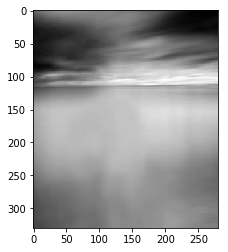

In [13]:
rank20sky = low_rank_approximation(sky, 20)
plt.imshow(rank20sky, cmap = 'gray')

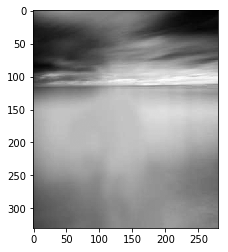

In [14]:
rank100sky = low_rank_approximation(sky, 100)
plt.imshow(rank100sky, cmap = 'gray')

# Part c)

In [34]:
def mse(img1, img2):
    # YOUR CODE GOES HERE
    #NOTE: This function actually uses the Mean Squared Error, not the spec's definition. 
    #Clarification here: (https://piazza.com/class/jpdq1epqrr3231?cid=695)
    error = 0
    for i in range(img1.shape[0]):
        for j in range(img1.shape[1]):
            error += (img1[i][j] - img2[i][j])**2
    return error/(img1.shape[0] * img1.shape[1])

In [35]:
#I wrote this helper function to compute all sky and face errors for each rank-k approximation.
def plot_errors():
    face_err = []
    k = 1
    for k in range(100):
        approx = low_rank_approximation(face, k)
        face_err.append(mse(face, approx))
    sky_err = []
    z = 1
    for z in range(100):
        approx = low_rank_approximation(sky, z)
        sky_err.append(mse(sky, approx))
    return face_err, sky_err

In [36]:
f, s = plot_errors()

In [37]:
x_vals = np.arange(100)

Text(0.5, 1.0, 'Mean Squared Error between original image and rank k approximation')

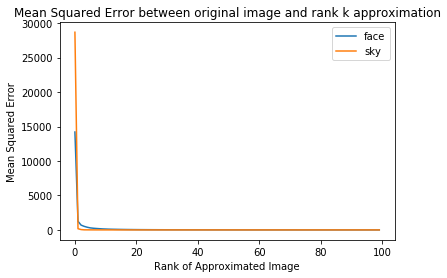

In [41]:
plt.plot(x_vals, f, label = 'face')
#plotting face errors
plt.plot(x_vals, s, label = 'sky')
#plotting sky errors
plt.legend()
plt.ylabel("Mean Squared Error")
plt.xlabel("Rank of Approximated Image")
plt.title("Mean Squared Error between original image and rank k approximation")
#linear y-scale

Text(0.5, 1.0, 'Mean Squared Error (logarithmic) between original image and rank k approximation')

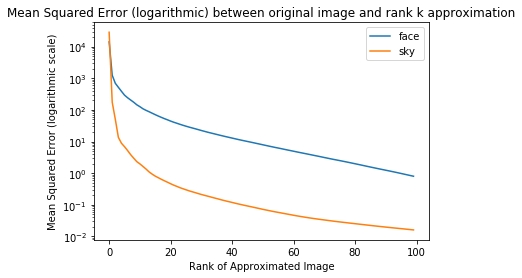

In [42]:
plt.plot(x_vals, f, label = 'face')
#plotting face errors
plt.plot(x_vals, s, label = 'sky')
#plotting sky errors
plt.legend()
plt.yscale(value = "log")
#log y-scale
plt.ylabel("Mean Squared Error (logarithmic scale)")
plt.xlabel("Rank of Approximated Image")
plt.title("Mean Squared Error (logarithmic) between original image and rank k approximation")

In [43]:
#part (d)

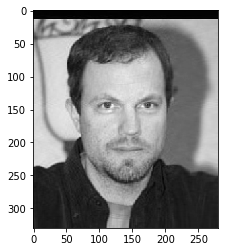

In [52]:
rank50face = low_rank_approximation(face, 50)
plt.imshow(rank50face, cmap = 'gray')

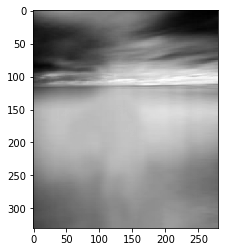

In [56]:
rank25sky = low_rank_approximation(sky, 25)
plt.imshow(rank30sky, cmap = 'gray')

In [ ]:
#rank 25 for sky
#rank 50 for face